In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

In [0]:
# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y
 
# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

In [0]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


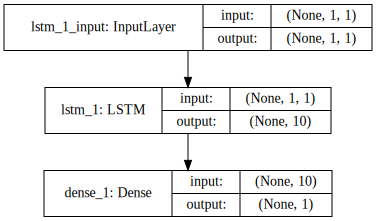

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [31]:
# fit model
X,y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=200, validation_data=(valX, valY), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3945e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3935e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 3/200
5/5 [==============================] - 0s 969us/step - loss: 3.3927e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3917e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3908e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3899e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.2000
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3890e-05 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.20

Text(0.5,1,'Loss Curves')

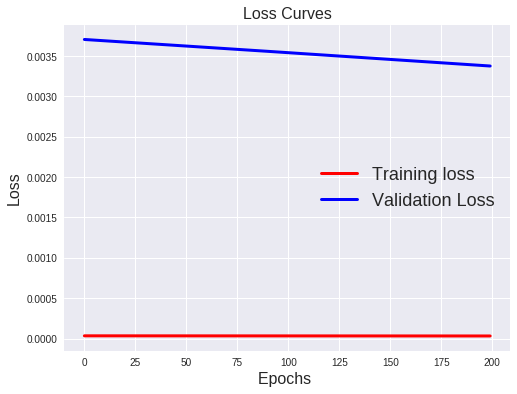

In [32]:
import matplotlib.pyplot as plt
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 

Text(0.5,1,'Accuracy Curves')

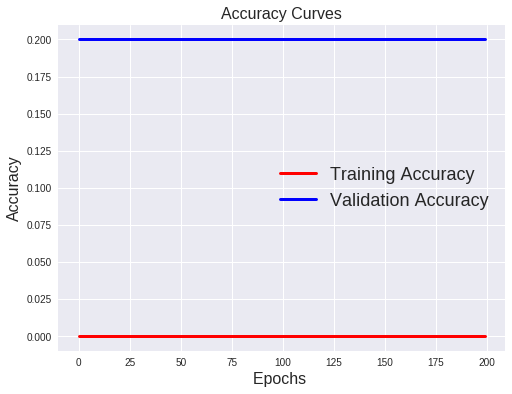

In [33]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
